# CASE Study


In [25]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt


depot_df = pd.read_excel('Depot Information.xlsx')
trans_df = pd.read_excel('Deposits Transactions 2023 2024.xlsx')
dist_df = pd.read_excel('Optional - Driving Distance and Time.xlsx')

## Data Exploration


In [53]:
depot_df.head(10)

,Notes,Region,Depot Designation,Depot Address
0,Added Depot,Bank,Oklahoma Mothers’ Milk Bank,"940 NE 13th St, Garrison Tower, Suite 1220, Ok..."
1,NaN,Local Depots,Integris Southwest,"4401 S Western Ave, OKC, OK 73109"
2,NaN,Local Depots,Integris Baptist,"3300 Northwest Expy, OKC, OK 73112"
3,NaN,Local Depots,Cleveland County Moore,"424 S Eastern Ave, Moore, OK 73160"
4,Added Depot,Local Depots,Variety Care- Lafayette,"500 SW 44th St., Oklahoma City, OK 73109"
5,Added ZIP,Local Depots,Edmond Hope Center,"1251 N Broadway, Edmond, OK 73034"
6,NaN,Local Depots,Canadian Valley,"1201 Health Center Parkway, Yukon, OK 73099"
7,NaN,Local Depots,St. Anthony Shawnee Hospital,"1102 W MacArthur St, Shawnee, OK 74804"
8,NaN,Local Depots,OU Children’s Hospital,"1200 Children’s Ave, OKC, OK 73104"
9,NaN,Tulsa Depots,OBI,"4601 E 81st St, Tulsa, OK 74137"


In [54]:
trans_df.head(10)

,Deposit ID,Deposit Date,Depo,Volume (oz)
0,1,2022-12-26,Oklahoma Mothers’ Milk Bank,150.00
1,17,2022-12-26,KUMC - Kansas Health Systems – St. Francis Campus,120.25
2,23,2022-12-26,Flint Hills- Riley County Health Department,142.79
3,17,2022-12-26,KUMC - Kansas Health Systems – St. Francis Campus,114.64
4,5,2022-12-26,Variety Care- Lafayette,135.91
5,21,2022-12-26,Salina Regional,125.77
6,7,2022-12-26,Canadian Valley,122.35
7,7,2022-12-26,Canadian Valley,131.72
8,37,2022-12-26,McAlester Regional Health,89.11
9,35,2022-12-26,Jackson County Altus,119.15


In [55]:
dist_df.head(10)

,Pair_key,Depot 1 Designation,Depot 2 Designation,Driving Time (minutes),Driving Distance (miles)
0,Oklahoma Mothers’ Milk Bank|Integris Southwest,Oklahoma Mothers’ Milk Bank,Integris Southwest,12.416667,6.7437
1,Oklahoma Mothers’ Milk Bank|Integris Baptist,Oklahoma Mothers’ Milk Bank,Integris Baptist,14.050000,8.8166
2,Oklahoma Mothers’ Milk Bank|Cleveland County M...,Oklahoma Mothers’ Milk Bank,Cleveland County Moore,19.383333,11.4450
3,Oklahoma Mothers’ Milk Bank|Variety Care- Lafa...,Oklahoma Mothers’ Milk Bank,Variety Care- Lafayette,13.200000,7.4378
4,Oklahoma Mothers’ Milk Bank|Edmond Hope Center,Oklahoma Mothers’ Milk Bank,Edmond Hope Center,20.933333,15.1602
5,Oklahoma Mothers’ Milk Bank|Canadian Valley,Oklahoma Mothers’ Milk Bank,Canadian Valley,22.433333,18.4752
6,Oklahoma Mothers’ Milk Bank|St. Anthony Shawne...,Oklahoma Mothers’ Milk Bank,St. Anthony Shawnee Hospital,38.433333,37.0138
7,Oklahoma Mothers’ Milk Bank|OU Children’s Hosp...,Oklahoma Mothers’ Milk Bank,OU Children’s Hospital,3.266667,0.5530
8,Oklahoma Mothers’ Milk Bank|OBI,Oklahoma Mothers’ Milk Bank,OBI,91.033333,105.0919
9,Oklahoma Mothers’ Milk Bank|Tulsa Hillcrest Ho...,Oklahoma Mothers’ Milk Bank,Tulsa Hillcrest Hospital,91.816667,105.5648


Visualize Depot Counts by Region
Purpose: See how depots are distributed across regions.


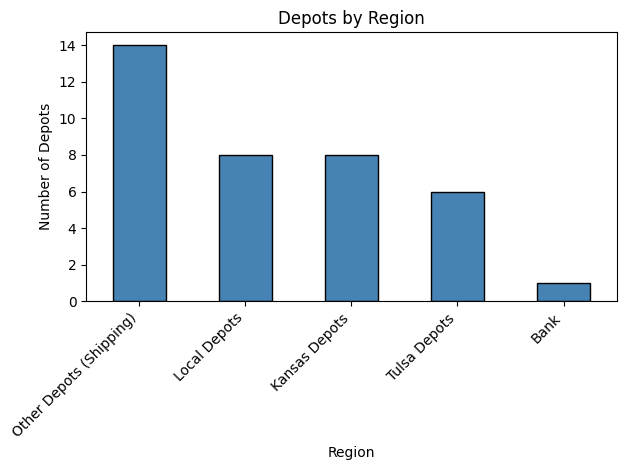

In [56]:

region_counts = depot_df['Region'].value_counts()
region_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.ylabel('Number of Depots')
plt.title('Depots by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Step 3: Calculate Fill Rates
Purpose: Figure out how fast each depot's freezer fills up. This determines how often we need to collect.

In [57]:
depot_stats = trans_df.groupby('Depo').agg({
    'Volume (oz)': ['count', 'sum', 'mean'],
    'Deposit Date': ['min', 'max']
})

depot_stats.columns = ['Num_Deposits', 'Total_Volume', 'Avg_Deposit', 'First_Date', 'Last_Date']
depot_stats = depot_stats.reset_index()

depot_stats['Days_Active'] = (depot_stats['Last_Date'] - depot_stats['First_Date']).dt.days
depot_stats['Daily_Fill_Rate'] = depot_stats['Total_Volume'] / depot_stats['Days_Active']

CAPACITY = 1000
THRESHOLD = 0.85
depot_stats['Days_To_Threshold'] = (CAPACITY * THRESHOLD) / depot_stats['Daily_Fill_Rate']

depot_stats = depot_stats.sort_values('Daily_Fill_Rate', ascending=False)
depot_stats[['Depo', 'Daily_Fill_Rate', 'Days_To_Threshold']].head(15)

,Depo,Daily_Fill_Rate,Days_To_Threshold
32,Variety Care- Lafayette,86.029195,9.880367
23,Oklahoma Mothers’ Milk Bank,83.904475,10.130568
5,Cleveland County Moore,81.926726,10.375125
8,Edmond Hope Center,79.565800,10.682982
13,Integris Southwest,77.390724,10.983228
12,Integris Baptist,76.688131,11.083853
29,St. Anthony Shawnee Hospital,76.678338,11.085269
3,Canadian Valley,75.634687,11.238230
22,OU Children’s Hospital,72.580861,11.711076
9,Flint Hills- Riley County Health Department,34.389168,24.717085


insight: There's a clear gap. Top 9 depots fill 2-3x faster than the rest. These are all Local Depots—they need frequent collection. The Tulsa and Kansas depots have more breathing room.


Visualize Fill Rates
Purpose: Make the volume gap visually obvious.

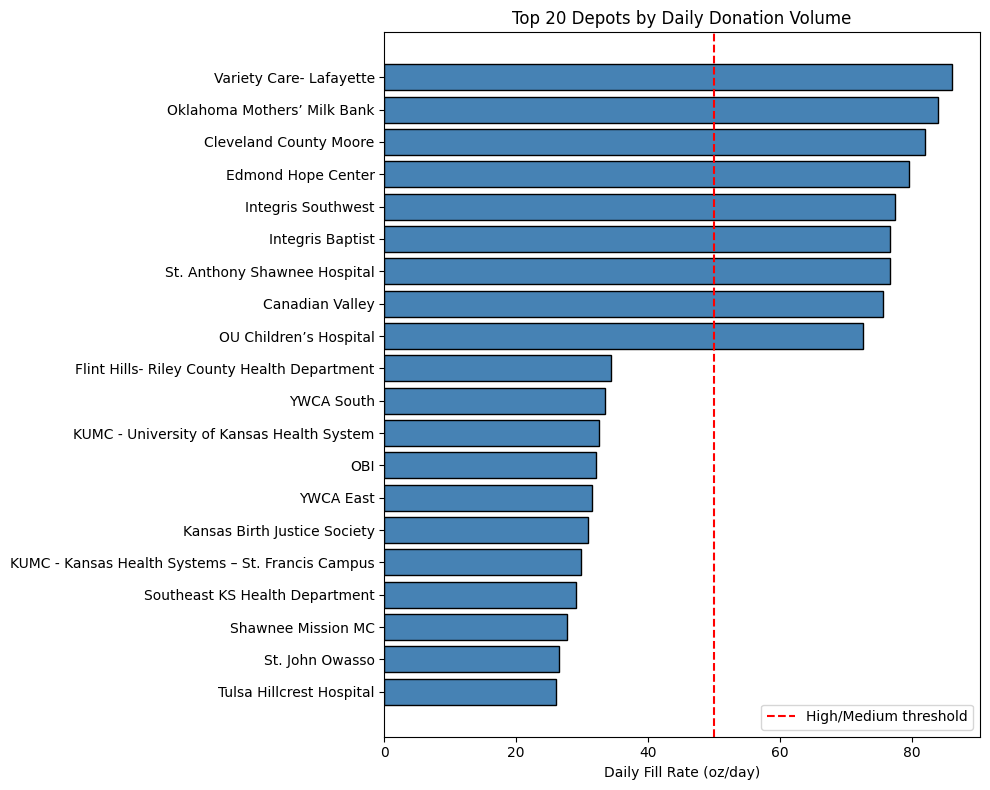

In [58]:
top_20 = depot_stats.head(20)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_20)), top_20['Daily_Fill_Rate'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_20)), top_20['Depo'])
plt.xlabel('Daily Fill Rate (oz/day)')
plt.title('Top 20 Depots by Daily Donation Volume')
plt.axvline(x=50, color='red', linestyle='--', label='High/Medium threshold')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

insight: The top 9 are the Local Depots. They receive 2-3x more donations than any other location. This is where collection efficiency matters most.

Analyze Distance from HQ
Purpose: See how far each depot is from headquarters. We'll combine this with fill rate to decide pickup vs. shipping.

In [59]:
hq_distances = dist_df[dist_df['Depot 1 Designation'].str.contains('Oklahoma Mothers', na=False)].copy()
hq_distances = hq_distances[['Depot 2 Designation', 'Driving Time (minutes)', 'Driving Distance (miles)']]
hq_distances.columns = ['Depo', 'Time_From_HQ', 'Distance_From_HQ']

depot_stats = depot_stats.merge(hq_distances, on='Depo', how='left')
depot_stats[['Depo', 'Daily_Fill_Rate', 'Time_From_HQ', 'Distance_From_HQ']].head(15)

,Depo,Daily_Fill_Rate,Time_From_HQ,Distance_From_HQ
0,Variety Care- Lafayette,86.029195,13.200000,7.4378
1,Oklahoma Mothers’ Milk Bank,83.904475,NaN,NaN
2,Cleveland County Moore,81.926726,19.383333,11.4450
3,Edmond Hope Center,79.565800,20.933333,15.1602
4,Integris Southwest,77.390724,12.416667,6.7437
5,Integris Baptist,76.688131,14.050000,8.8166
6,St. Anthony Shawnee Hospital,76.678338,38.433333,37.0138
7,Canadian Valley,75.634687,22.433333,18.4752
8,OU Children’s Hospital,72.580861,3.266667,0.5530
9,Flint Hills- Riley County Health Department,34.389168,249.616667,288.9127


Row 1 (HQ) has NaN—that's correct, it's the starting point. The data shows a clear pattern: high-volume depots are close, low-volume depots are far. Kansas depots are 4-5 hours away—not practical for pickup.

Scatter Plot - Distance vs Fill Rate
Purpose: Visualize the relationship between distance and volume. This will show us natural clusters for pickup vs. shipping.

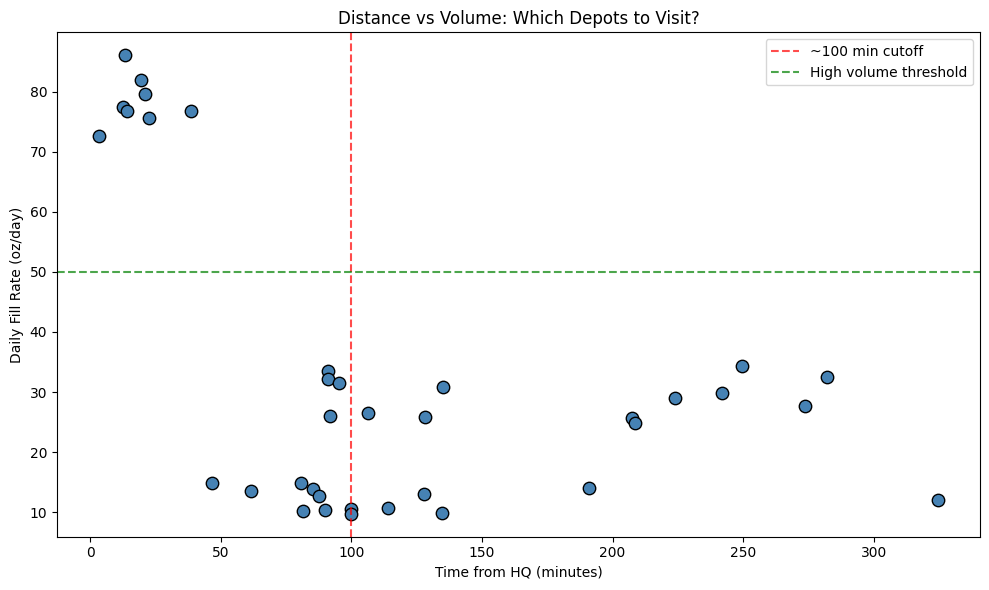

In [60]:
plot_data = depot_stats[depot_stats['Time_From_HQ'].notna()]

plt.figure(figsize=(10, 6))
plt.scatter(plot_data['Time_From_HQ'], plot_data['Daily_Fill_Rate'], s=80, c='steelblue', edgecolor='black')
plt.xlabel('Time from HQ (minutes)')
plt.ylabel('Daily Fill Rate (oz/day)')
plt.title('Distance vs Volume: Which Depots to Visit?')
plt.axvline(x=100, color='red', linestyle='--', alpha=0.7, label='~100 min cutoff')
plt.axhline(y=50, color='green', linestyle='--', alpha=0.7, label='High volume threshold')
plt.legend()
plt.tight_layout()
plt.show()

No depot is both far AND high-volume. The high-volume depots are all close to HQ. This makes the decision easy—we only need to drive far for medium-volume Tulsa depots, and those can be done in one weekly trip.


Classify Depots (Pickup vs Ship)
Purpose: Formally assign each depot to a collection method.

In [61]:
depot_info = depot_df[['Depot Designation', 'Region']].copy()
depot_info.columns = ['Depo', 'Region']
depot_stats = depot_stats.merge(depot_info, on='Depo', how='left')

def classify(row):
    if row['Region'] == 'Local Depots':
        return 'Pickup - Local'
    elif row['Region'] == 'Tulsa Depots':
        return 'Pickup - Tulsa'
    else:
        return 'Ship'

depot_stats['Method'] = depot_stats.apply(classify, axis=1)
depot_stats['Method'].value_counts()

Method
Ship              23
Pickup - Local     8
Pickup - Tulsa     6
Name: count, dtype: int64

Total pickups: 14 depots across 2 routes

Visualize Classification
Purpose: Simple chart showing the split.

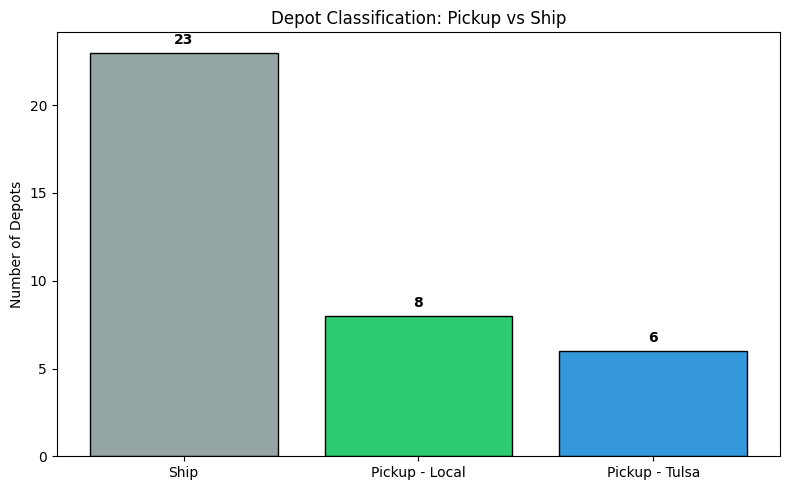

In [62]:
method_counts = depot_stats['Method'].value_counts()

plt.figure(figsize=(8, 5))
colors = {'Pickup - Local': '#2ecc71', 'Pickup - Tulsa': '#3498db', 'Ship': '#95a5a6'}
bars = plt.bar(method_counts.index, method_counts.values, 
               color=[colors[x] for x in method_counts.index], edgecolor='black')
plt.ylabel('Number of Depots')
plt.title('Depot Classification: Pickup vs Ship')
for bar, val in zip(bars, method_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(val), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

Clear split: 14 depots get pickup, 23 use shipping. The driver only needs to worry about 14 stops across two routes.

Build Distance Matrix & Optimize Routes
Purpose: Find the best order to visit depots on each route. We'll use nearest neighbor algorithm—simple and effective for small routes.


In [64]:
dist_df['Depot 1 Designation'].unique()[:5]

array(['Oklahoma Mothers’ Milk Bank', 'Integris Southwest',
       'Integris Baptist', 'Cleveland County Moore',
       'Variety Care- Lafayette'], dtype=object)

In [65]:
local_depots

['Variety Care- Lafayette',
 'Cleveland County Moore',
 'Edmond Hope Center',
 'Integris Southwest',
 'Integris Baptist',
 'St. Anthony Shawnee Hospital',
 'Canadian Valley',
 'OU Children’s Hospital']

Nearest neighbor exploration


In [79]:
dist_df = pd.read_excel('Optional - Driving Distance and Time.xlsx')
dist_df['Depot 1 Designation'] = dist_df['Depot 1 Designation'].str.replace(chr(8217), "'", regex=False)
dist_df['Depot 2 Designation'] = dist_df['Depot 2 Designation'].str.replace(chr(8217), "'", regex=False)

local_depots = depot_stats[depot_stats['Method'] == 'Pickup - Local']['Depo'].tolist()
tulsa_depots = depot_stats[depot_stats['Method'] == 'Pickup - Tulsa']['Depo'].tolist()
local_depots = [d.replace(chr(8217), "'") for d in local_depots]
tulsa_depots = [d.replace(chr(8217), "'") for d in tulsa_depots]

hq_name = "Oklahoma Mothers' Milk Bank"

def get_time(d1, d2):
    if d1 == d2:
        return 0
    row = dist_df[(dist_df['Depot 1 Designation'] == d1) & (dist_df['Depot 2 Designation'] == d2)]
    if len(row) > 0:
        return row.iloc[0]['Driving Time (minutes)']
    row = dist_df[(dist_df['Depot 1 Designation'] == d2) & (dist_df['Depot 2 Designation'] == d1)]
    if len(row) > 0:
        return row.iloc[0]['Driving Time (minutes)']
    return 9999

def solve_tsp(depots, start):
    route = []
    unvisited = set(depots)
    current = start
    total_time = 0
    
    while unvisited:
        best_next = min(unvisited, key=lambda x: get_time(current, x))
        total_time += get_time(current, best_next)
        route.append(best_next)
        current = best_next
        unvisited.remove(best_next)
    
    total_time += get_time(current, start)
    return route, total_time

local_route, local_drive = solve_tsp(local_depots, hq_name)
tulsa_route, tulsa_drive = solve_tsp(tulsa_depots, hq_name)

print("LOCAL ROUTE:")
for i, stop in enumerate(local_route, 1):
    print(f"  {i}. {stop}")
print(f"Driving time: {local_drive:.1f} min ({local_drive/60:.1f} hrs)")

print("\nTULSA ROUTE:")
for i, stop in enumerate(tulsa_route, 1):
    print(f"  {i}. {stop}")
print(f"Driving time: {tulsa_drive:.1f} min ({tulsa_drive/60:.1f} hrs)")

LOCAL ROUTE:
  1. OU Children's Hospital
  2. Integris Southwest
  3. Variety Care- Lafayette
  4. Cleveland County Moore
  5. Integris Baptist
  6. Canadian Valley
  7. Edmond Hope Center
  8. St. Anthony Shawnee Hospital
Driving time: 189.5 min (3.2 hrs)

TULSA ROUTE:
  1. OBI
  2. YWCA South
  3. Tulsa Hillcrest Hospital
  4. YWCA East
  5. St. John Owasso
  6. Jane Phillips Medical Center
Driving time: 309.2 min (5.2 hrs)


Visualize Weekly Schedule
Purpose: Show the driver's weekly workload.

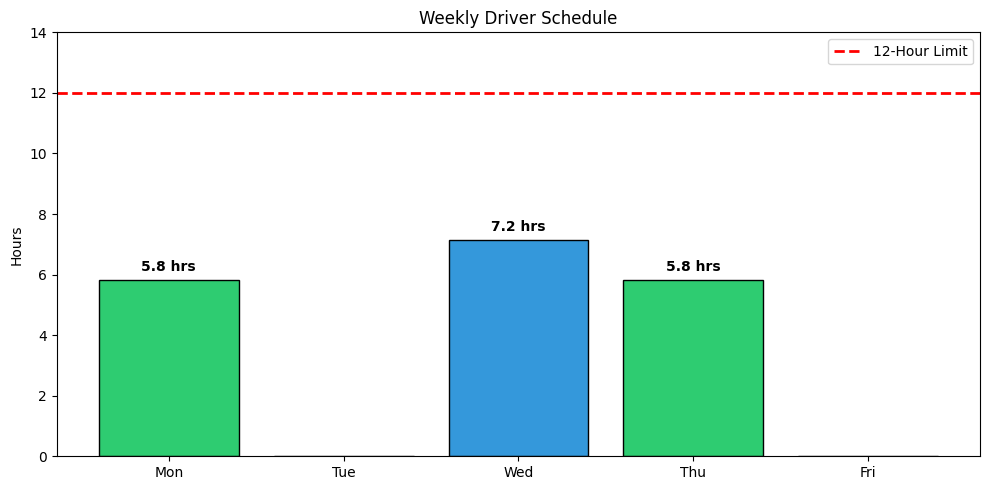


Weekly Total: 18.8 hours


In [80]:
SERVICE_TIME = 20

local_total = local_drive + len(local_depots) * SERVICE_TIME
tulsa_total = tulsa_drive + len(tulsa_depots) * SERVICE_TIME

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
hours = [local_total/60, 0, tulsa_total/60, local_total/60, 0]
labels = ['Local', 'Office', 'Tulsa', 'Local', 'Backup']
colors = ['#2ecc71', '#ecf0f1', '#3498db', '#2ecc71', '#ecf0f1']

plt.figure(figsize=(10, 5))
bars = plt.bar(days, hours, color=colors, edgecolor='black')
plt.axhline(y=12, color='red', linestyle='--', linewidth=2, label='12-Hour Limit')
plt.ylabel('Hours')
plt.title('Weekly Driver Schedule')
plt.ylim(0, 14)

for bar, label, h in zip(bars, labels, hours):
    if h > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{h:.1f} hrs', ha='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

print(f"\nWeekly Total: {sum(hours):.1f} hours")

We now have all the numbers we need for the report:
MetricValueTotal depots37 (36 + HQ)Pickup depots14 (8 Local + 6 Tulsa)Shipping depots22 (8 Kansas + 14 Other)Local route time5.8 hrs (3.2 driving + 2.6 service)Tulsa route time7.2 hrs (5.2 driving + 2.0 service)Weekly driver hours18.8 hrsLocal frequencyTwice weekly (Mon/Thu)Tulsa frequencyWeekly (Wed)

## Pyomo model

In [82]:
import pyomo.environ as pyo

local_nodes = [hq_name] + local_depots
n_local = len(local_nodes)

local_dist = {}
for i, d1 in enumerate(local_nodes):
    for j, d2 in enumerate(local_nodes):
        local_dist[i, j] = get_time(d1, d2)

print(f"Nodes: {n_local}")
for i, name in enumerate(local_nodes):
    print(f"  {i}: {name}")

Nodes: 9
  0: Oklahoma Mothers' Milk Bank
  1: Variety Care- Lafayette
  2: Cleveland County Moore
  3: Edmond Hope Center
  4: Integris Southwest
  5: Integris Baptist
  6: St. Anthony Shawnee Hospital
  7: Canadian Valley
  8: OU Children's Hospital


In [84]:
model = pyo.ConcreteModel()

model.N = pyo.RangeSet(0, n_local - 1)
model.x = pyo.Var(model.N, model.N, domain=pyo.Binary)
model.u = pyo.Var(model.N, domain=pyo.NonNegativeReals, bounds=(0, n_local - 1))

# Objective: minimize total travel time
def obj_rule(m):
    return sum(local_dist[i, j] * m.x[i, j] for i in m.N for j in m.N)
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

# Constraint: leave each node exactly once
def leave_rule(m, i):
    return sum(m.x[i, j] for j in m.N if j != i) == 1
model.leave = pyo.Constraint(model.N, rule=leave_rule)

# Constraint: enter each node exactly once
def enter_rule(m, j):
    return sum(m.x[i, j] for i in m.N if i != j) == 1
model.enter = pyo.Constraint(model.N, rule=enter_rule)

# Constraint: no self-loops
def no_self_rule(m, i):
    return m.x[i, i] == 0
model.no_self = pyo.Constraint(model.N, rule=no_self_rule)

# MTZ subtour elimination
def mtz_rule(m, i, j):
    if i != 0 and j != 0 and i != j:
        return m.u[i] - m.u[j] + n_local * m.x[i, j] <= n_local - 1
    return pyo.Constraint.Skip
model.mtz = pyo.Constraint(model.N, model.N, rule=mtz_rule)



In [85]:
solver = pyo.SolverFactory('glpk')
result = solver.solve(model, tee=False)

# Extract route
route = []
current = 0
for _ in range(n_local):
    for j in model.N:
        if j != current and pyo.value(model.x[current, j]) > 0.5:
            route.append(j)
            current = j
            break

print("OPTIMAL LOCAL ROUTE:")
print(f"  0: {local_nodes[0]} (Start)")
for i, idx in enumerate(route[:-1], 1):
    print(f"  {i}: {local_nodes[idx]}")
print(f"  {len(route)}: {local_nodes[0]} (Return)")

total_time = pyo.value(model.obj)
print(f"\nTotal driving time: {total_time:.1f} min ({total_time/60:.1f} hrs)")

OPTIMAL LOCAL ROUTE:
  0: Oklahoma Mothers' Milk Bank (Start)
  1: Edmond Hope Center
  2: Integris Baptist
  3: Canadian Valley
  4: Integris Southwest
  5: Variety Care- Lafayette
  6: Cleveland County Moore
  7: St. Anthony Shawnee Hospital
  8: OU Children's Hospital
  9: Oklahoma Mothers' Milk Bank (Return)

Total driving time: 167.8 min (2.8 hrs)


Pyomo found a better route than our heuristic.

In [86]:
tulsa_nodes = [hq_name] + tulsa_depots
n_tulsa = len(tulsa_nodes)

tulsa_dist = {}
for i, d1 in enumerate(tulsa_nodes):
    for j, d2 in enumerate(tulsa_nodes):
        tulsa_dist[i, j] = get_time(d1, d2)

model2 = pyo.ConcreteModel()

model2.N = pyo.RangeSet(0, n_tulsa - 1)
model2.x = pyo.Var(model2.N, model2.N, domain=pyo.Binary)
model2.u = pyo.Var(model2.N, domain=pyo.NonNegativeReals, bounds=(0, n_tulsa - 1))

def obj_rule2(m):
    return sum(tulsa_dist[i, j] * m.x[i, j] for i in m.N for j in m.N)
model2.obj = pyo.Objective(rule=obj_rule2, sense=pyo.minimize)

def leave_rule2(m, i):
    return sum(m.x[i, j] for j in m.N if j != i) == 1
model2.leave = pyo.Constraint(model2.N, rule=leave_rule2)

def enter_rule2(m, j):
    return sum(m.x[i, j] for i in m.N if i != j) == 1
model2.enter = pyo.Constraint(model2.N, rule=enter_rule2)

def no_self_rule2(m, i):
    return m.x[i, i] == 0
model2.no_self = pyo.Constraint(model2.N, rule=no_self_rule2)

def mtz_rule2(m, i, j):
    if i != 0 and j != 0 and i != j:
        return m.u[i] - m.u[j] + n_tulsa * m.x[i, j] <= n_tulsa - 1
    return pyo.Constraint.Skip
model2.mtz = pyo.Constraint(model2.N, model2.N, rule=mtz_rule2)

solver.solve(model2, tee=False)

route2 = []
current = 0
for _ in range(n_tulsa):
    for j in model2.N:
        if j != current and pyo.value(model2.x[current, j]) > 0.5:
            route2.append(j)
            current = j
            break

print("OPTIMAL TULSA ROUTE:")
print(f"  0: {tulsa_nodes[0]} (Start)")
for i, idx in enumerate(route2[:-1], 1):
    print(f"  {i}: {tulsa_nodes[idx]}")
print(f"  {len(route2)}: {tulsa_nodes[0]} (Return)")

total_time2 = pyo.value(model2.obj)
print(f"\nTotal driving time: {total_time2:.1f} min ({total_time2/60:.1f} hrs)")

OPTIMAL TULSA ROUTE:
  0: Oklahoma Mothers' Milk Bank (Start)
  1: YWCA South
  2: Tulsa Hillcrest Hospital
  3: Jane Phillips Medical Center
  4: St. John Owasso
  5: YWCA East
  6: OBI
  7: Oklahoma Mothers' Milk Bank (Return)

Total driving time: 300.2 min (5.0 hrs)


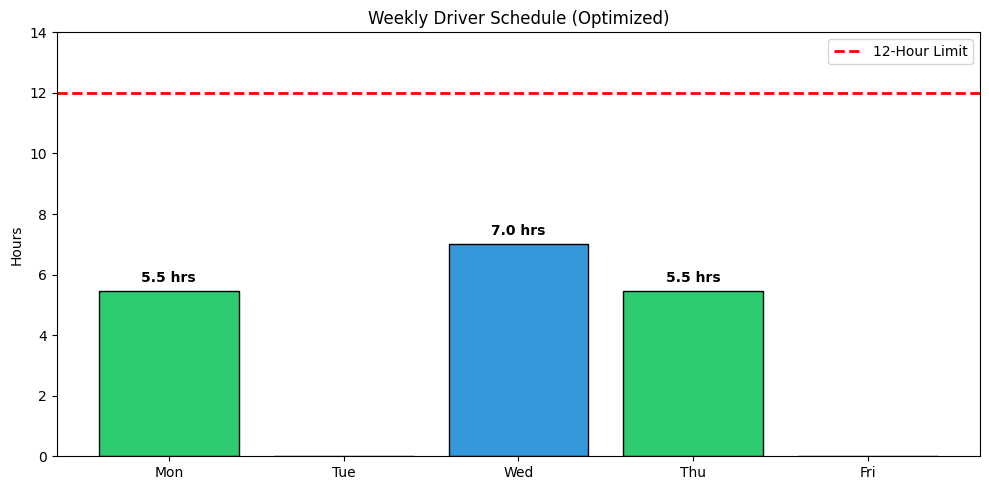

Weekly Total: 17.9 hours


In [87]:
SERVICE_TIME = 20

local_total_opt = total_time + len(local_depots) * SERVICE_TIME
tulsa_total_opt = total_time2 + len(tulsa_depots) * SERVICE_TIME

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
hours = [local_total_opt/60, 0, tulsa_total_opt/60, local_total_opt/60, 0]

plt.figure(figsize=(10, 5))
colors = ['#2ecc71', '#ecf0f1', '#3498db', '#2ecc71', '#ecf0f1']
bars = plt.bar(days, hours, color=colors, edgecolor='black')
plt.axhline(y=12, color='red', linestyle='--', linewidth=2, label='12-Hour Limit')
plt.ylabel('Hours')
plt.title('Weekly Driver Schedule (Optimized)')
plt.ylim(0, 14)

for bar, h in zip(bars, hours):
    if h > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{h:.1f} hrs', ha='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Weekly Total: {sum(hours):.1f} hours")

Final Optimized Results:
RouteDrivingServiceTotalLocal2.8 hrs2.7 hrs (8 stops)5.5 hrsTulsa5.0 hrs2.0 hrs (6 stops)7.0 hrsWeekly——17.9 hrs
Saved ~1 hour/week compared to nearest neighbor heuristic.

